In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from os import listdir, path 
from openpyxl import load_workbook

In [19]:
algs = {
  "SPMST": "output_data-SPMST_ver3",
  "RSPH": "output_data-RSPH_ver2",
  "SPGA": "output_data-SPGA_ver2",
}
ordered_types = ["Type_1_Small", "Type_5_Small", "Type_6_Small", "Type_1_Large", "Type_3_Large", "Type_5_Large", "Type_6_Large"]
df = pd.DataFrame
for alg in algs:
  for instype_csv in listdir(algs[alg]):
    if instype_csv[-4:] == ".csv":
      tmp = pd.read_csv(algs[alg] + "\\" + instype_csv)
      if df.empty:
        df = tmp
      else:
        df = df.append(tmp)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13110 entries, 0 to 1109
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  13110 non-null  object 
 1   Type       13110 non-null  object 
 2   Instance   13110 non-null  object 
 3   Seed       13110 non-null  object 
 4   Result     13110 non-null  object 
 5   Rs         13110 non-null  float64
dtypes: float64(1), object(5)
memory usage: 717.0+ KB


,Algorithm,Type,Instance,Seed,Result,Rs
0,SPMST,Type_1_Large,100rat783,0,44220,3.446202
1,SPMST,Type_1_Large,100rat783,1,44220,3.586315
2,SPMST,Type_1_Large,100rat783,2,44220,3.845333
3,SPMST,Type_1_Large,100rat783,3,44220,3.516564
4,SPMST,Type_1_Large,100rat783,4,44220,3.896075


In [20]:
valid_instances = []
for i in df[df.Type.isin(ordered_types)].Instance.unique():
  c = df[df.Instance == i].count()
  if c["Instance"] == 90:
    valid_instances.append(i)
valid_instances

['100rat783',
 '10a280',
 '10gil262',
 '10lin318',
 '10pcb442',
 '10pr439',
 '25a280',
 '25gil262',
 '25lin318',
 '25pcb442',
 '25pr439',
 '50a280',
 '50gil262',
 '50lin318',
 '50pcb442',
 '50pr439',
 '10berlin52',
 '10eil51',
 '10eil76',
 '10kroB100',
 '10pr76',
 '10rat99',
 '10st70',
 '15berlin52',
 '15eil51',
 '15eil76',
 '15pr76',
 '15st70',
 '25eil101',
 '25kroA100',
 '25lin105',
 '25rat99',
 '50eil101',
 '50kroA100',
 '50kroB100',
 '50lin105',
 '50rat99',
 '5berlin52',
 '5eil51',
 '5eil76',
 '5pr76',
 '5st70',
 '75lin105',
 '6i300',
 '6i350',
 '6i400',
 '6i450',
 '6i500',
 '10i300-109',
 '10i400-206',
 '10i500-305',
 '15i300-110',
 '15i400-207',
 '15i500-306',
 '20i300-111',
 '20i400-208',
 '20i500-307',
 '25i300-112',
 '25i400-209',
 '25i500-308',
 '5i300-108',
 '5i400-205',
 '5i500-304',
 '10i120-46',
 '10i30-17',
 '10i45-18',
 '10i60-21',
 '10i65-21',
 '10i70-21',
 '10i75-22',
 '10i90-33',
 '5i120-46',
 '5i30-17',
 '5i45-18',
 '5i60-21',
 '5i65-21',
 '5i70-21',
 '5i75-22',
 '5

In [21]:
instypes = {}
for t in ordered_types:
  instypes[t] = df.loc[(df.Type == t) & (df.Instance.isin(valid_instances))].Instance.unique()

instypes

{'Type_1_Small': array(['10berlin52', '10eil51', '10eil76', '10kroB100', '10pr76',
        '10rat99', '10st70', '15berlin52', '15eil51', '15eil76', '15pr76',
        '15st70', '25eil101', '25kroA100', '25lin105', '25rat99',
        '50eil101', '50kroA100', '50kroB100', '50lin105', '50rat99',
        '5berlin52', '5eil51', '5eil76', '5pr76', '5st70', '75lin105'],
       dtype=object),
 'Type_5_Small': array(['10i120-46', '10i30-17', '10i45-18', '10i60-21', '10i65-21',
        '10i70-21', '10i75-22', '10i90-33', '5i120-46', '5i30-17',
        '5i45-18', '5i60-21', '5i65-21', '5i70-21', '5i75-22', '5i90-33',
        '7i30-17', '7i45-18', '7i60-21', '7i65-21', '7i70-21'],
       dtype=object),
 'Type_6_Small': array(['10berlin52-2x5', '12eil51-3x4', '12eil76-3x4', '12pr76-3x4',
        '12st70-3x4', '15pr76-3x5', '16eil51-4x4', '16eil76-4x4',
        '16lin105-4x4', '16st70-4x4', '18pr76-3x6', '20eil51-4x5',
        '20eil76-4x5', '20st70-4x5', '25eil101-5x5', '25eil51-5x5',
        '25eil

In [22]:
best = {}
for insname in df.Instance.unique():
  best[insname] = min(df.Result[insname == df.Instance])

df['Best'] = [best[row.Instance] for index, row in df.iterrows()]
df['RPD'] = (df['Result'] - df['Best']) * 100 / df['Best']
df.dropna(subset=["RPD"], inplace=True)
df

,Algorithm,Type,Instance,Seed,Result,Rs,Best,RPD
0,SPMST,Type_1_Large,100rat783,0,44220,3.446202,1311,3272.997712
1,SPMST,Type_1_Large,100rat783,1,44220,3.586315,1311,3272.997712
2,SPMST,Type_1_Large,100rat783,2,44220,3.845333,1311,3272.997712
3,SPMST,Type_1_Large,100rat783,3,44220,3.516564,1311,3272.997712
4,SPMST,Type_1_Large,100rat783,4,44220,3.896075,1311,3272.997712
...,...,...,...,...,...,...,...,...
1105,SPGA,Type_6_Small,9st70-3x3,25,804,11.737460,804,0.0
1106,SPGA,Type_6_Small,9st70-3x3,26,804,11.603497,804,0.0
1107,SPGA,Type_6_Small,9st70-3x3,27,804,12.331345,804,0.0
1108,SPGA,Type_6_Small,9st70-3x3,28,804,11.970105,804,0.0


<AxesSubplot:xlabel='Type', ylabel='RPD'>

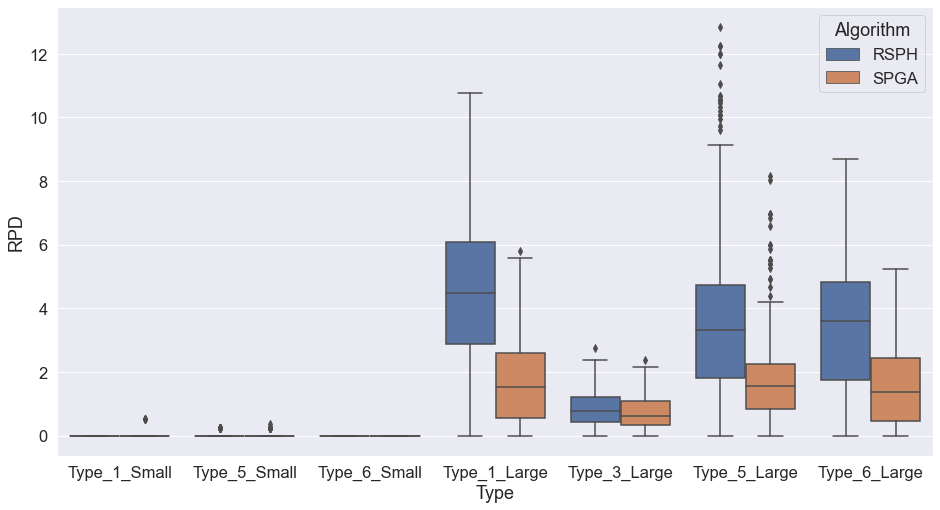

In [23]:
rcParams['figure.figsize'] = 15.7,8.27
data = df[(df.Algorithm != "SPMST") & (df.Instance.isin(valid_instances))]
sns.set(font_scale = 1.5)
sns.boxplot(x = 'Type', y = 'RPD', data = data, hue = 'Algorithm', order=ordered_types)

In [24]:
# Calculate BF and AVG of each algorithm on each instance
instances = valid_instances
algorithms = df.Algorithm.unique()
columns = []
for alg in algorithms:
  columns.append(alg + "_BF")
  columns.append(alg + "_AVG")

print(columns)

arr = [[0 for alg in columns] for i in instances]
for i in range(len(instances)):
  ins = instances[i]
  for j in range(len(columns)):
    alg = columns[j].split("_")[0]
    op = columns[j].split("_")[1]
    tmp = df.loc[(alg == df.Algorithm) & (ins == df.Instance)].Result
    if op == "BF":
      arr[i][j] = 0 if len(tmp) == 0 else min(tmp)
    else:
      arr[i][j] = 0 if len(tmp) == 0 else sum(tmp)/len(tmp)

df2 = pd.DataFrame(np.array(arr), columns=columns, index=instances)
df2

['SPMST_BF', 'SPMST_AVG', 'RSPH_BF', 'RSPH_AVG', 'SPGA_BF', 'SPGA_AVG']


,SPMST_BF,SPMST_AVG,RSPH_BF,RSPH_AVG,SPGA_BF,SPGA_AVG
100rat783,44220.0,44220.0,1393.0,1417.400000,1311.0,1355.266667
10a280,8901.0,8901.0,742.0,751.700000,741.0,743.766667
10gil262,7324.0,7324.0,755.0,763.700000,755.0,755.500000
10lin318,8738.0,8738.0,682.0,691.933333,682.0,688.966667
10pcb442,10846.0,10846.0,626.0,635.733333,613.0,627.966667
...,...,...,...,...,...,...
9eil101-3x3,3637.0,3637.0,891.0,891.000000,891.0,891.000000
9eil51-3x3,4140.0,4140.0,863.0,863.000000,863.0,863.000000
9eil76-3x3,3334.0,3334.0,857.0,857.000000,857.0,857.000000
9pr76-3x3,4583.0,4583.0,900.0,900.000000,900.0,900.000000


In [25]:
df2["PI_SPGA_SPMST"] = (df2["SPMST_AVG"] - df2["SPGA_AVG"]) / df2["SPMST_AVG"] * 100
df2["PI_SPGA_RSPH"] = (df2["RSPH_AVG"] - df2["SPGA_AVG"]) / df2["RSPH_AVG"] * 100
df2

,SPMST_BF,SPMST_AVG,RSPH_BF,RSPH_AVG,SPGA_BF,SPGA_AVG,PI_SPGA_SPMST,PI_SPGA_RSPH
100rat783,44220.0,44220.0,1393.0,1417.400000,1311.0,1355.266667,96.935173,4.383613
10a280,8901.0,8901.0,742.0,751.700000,741.0,743.766667,91.644010,1.055386
10gil262,7324.0,7324.0,755.0,763.700000,755.0,755.500000,89.684599,1.073720
10lin318,8738.0,8738.0,682.0,691.933333,682.0,688.966667,92.115282,0.428750
10pcb442,10846.0,10846.0,626.0,635.733333,613.0,627.966667,94.210154,1.221686
...,...,...,...,...,...,...,...,...
9eil101-3x3,3637.0,3637.0,891.0,891.000000,891.0,891.000000,75.501787,0.000000
9eil51-3x3,4140.0,4140.0,863.0,863.000000,863.0,863.000000,79.154589,0.000000
9eil76-3x3,3334.0,3334.0,857.0,857.000000,857.0,857.000000,74.295141,0.000000
9pr76-3x3,4583.0,4583.0,900.0,900.000000,900.0,900.000000,80.362208,0.000000


In [26]:
def get_type_instances(t):
  return df2.loc[instypes[t]]

get_type_instances("Type_5_Large").drop(columns=["PI_SPGA_SPMST", "PI_SPGA_RSPH"])

,SPMST_BF,SPMST_AVG,RSPH_BF,RSPH_AVG,SPGA_BF,SPGA_AVG
10i300-109,9929.0,9929.0,637.0,642.433333,636.0,640.600000
10i400-206,10194.0,10194.0,628.0,635.433333,624.0,630.033333
10i500-305,8627.0,8627.0,671.0,683.466667,667.0,676.866667
15i300-110,11799.0,11799.0,791.0,805.600000,784.0,794.900000
15i400-207,14799.0,14799.0,837.0,863.200000,831.0,840.700000
15i500-306,13945.0,13945.0,728.0,745.266667,716.0,729.400000
20i300-111,10415.0,10415.0,959.0,980.200000,936.0,958.066667
20i400-208,14121.0,14121.0,963.0,980.400000,933.0,951.500000
20i500-307,14909.0,14909.0,771.0,795.700000,761.0,773.166667
25i300-112,12915.0,12915.0,973.0,1000.433333,962.0,978.333333


In [31]:
def dfpi(which_pi):
  arr = []
  for i in ordered_types:
    instances = instypes[i]
    tmp = df2.loc[instances][which_pi].dropna()
    if len(tmp) > 0:
      arr.append([min(tmp), sum(tmp) / len(tmp), max(tmp), str(sum(1 for pi in tmp if pi > 0)) + "/" + str(len(tmp))])
    else:
      arr.append([0, 0, 0, "0/0"])

  return pd.DataFrame(arr, columns=["Minimum PI", "Average PI", "Maximum PI", "Better"], index=ordered_types)
dfpi("PI_SPGA_SPMST")

,Minimum PI,Average PI,Maximum PI,Better
Type_1_Small,60.796460,74.132488,88.682560,27/27
Type_5_Small,25.041736,74.328575,90.647922,21/21
Type_6_Small,45.050056,75.323842,89.232804,37/37
Type_1_Large,89.684599,93.447277,96.935173,16/16
Type_3_Large,90.975207,92.352079,93.538875,5/5
Type_5_Large,89.651411,93.057920,95.612465,15/15
Type_6_Large,90.458493,92.557834,94.824645,15/15


In [28]:
df3 = pd.DataFrame()
df3[["SPMST", "RSPH", "SPGA"]] = df2[["SPMST_AVG", "RSPH_AVG", "SPGA_AVG"]]
df3.to_csv("result_AVG.csv")
df3

,SPMST,RSPH,SPGA
100rat783,44220.0,1417.400000,1355.266667
10a280,8901.0,751.700000,743.766667
10gil262,7324.0,763.700000,755.500000
10lin318,8738.0,691.933333,688.966667
10pcb442,10846.0,635.733333,627.966667
...,...,...,...
9eil101-3x3,3637.0,891.000000,891.000000
9eil51-3x3,4140.0,863.000000,863.000000
9eil76-3x3,3334.0,857.000000,857.000000
9pr76-3x3,4583.0,900.000000,900.000000


In [29]:
df4 = pd.DataFrame()
df4[["SPMST", "RSPH", "SPGA"]] = df2[["SPMST_BF", "RSPH_BF", "SPGA_BF"]]
df4.to_csv("result_BF.csv")
df4

,SPMST,RSPH,SPGA
100rat783,44220.0,1393.0,1311.0
10a280,8901.0,742.0,741.0
10gil262,7324.0,755.0,755.0
10lin318,8738.0,682.0,682.0
10pcb442,10846.0,626.0,613.0
...,...,...,...
9eil101-3x3,3637.0,891.0,891.0
9eil51-3x3,4140.0,863.0,863.0
9eil76-3x3,3334.0,857.0,857.0
9pr76-3x3,4583.0,900.0,900.0


In [30]:
# book = load_workbook("AllResults.xlsx")
writer = pd.ExcelWriter("AllResults.xlsx", engine='openpyxl')
# writer.book = book
# writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

for instype in ordered_types:
  get_type_instances(instype).to_excel(writer, instype)

for alg in algs:
  df[df.Algorithm == alg].to_excel(writer, alg, index=False)

dfpi("PI_SPGA_SPMST").to_excel(writer, "PI_SPGA_SPMST")
dfpi("PI_SPGA_RSPH").to_excel(writer, "PI_SPGA_RSPH")
writer.save()